# 6.2 Exploring Relationships

# Table of Contents

## 1. Importing Data & Libraries
## 2. Cleaning Data
## 3. Correlations
## 4. Scatterplots
## 5. Categorical Plots
## 6. Exporting Data

### 1. Importing Data & Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

In [3]:
# Creating Path
path = r'/Users/mattwawner/Documents/Achievement 6'

In [4]:
# Importing data

df = pd.read_pickle(os.path.join(path, 'Clean_Boat_Data.pkl'))

### 2. Cleaning Data 

In [5]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Euro Price,Country,Region,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,226,3370.37,Switzerland,Lake Geneva,VÃ©senaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt,None
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,MÃ¼nchen
6,Catamaran,nan,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636.00,Switzerland,Neuenburgersee,Yvonand


In [8]:
# Creating a column for fuel type

df[['New/Used','Fuel Type']]= df['Type'].str.split(',', 2, expand=True)

In [9]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Euro Price,Country,Region,City,Fuel Type,New/Used
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,226,3370.37,Switzerland,Lake Geneva,VÃ©senaz,None,new boat from stock
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt,None,None,new boat from stock
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg,None,None,new boat from stock
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,MÃ¼nchen,None,new boat from stock
6,Catamaran,nan,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636.00,Switzerland,Neuenburgersee,Yvonand,Unleaded,Used boat


In [10]:
# Dropping 'Type' column

df_clean = df.drop(columns = ['Type'])

In [11]:
df_clean.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Euro Price,Country,Region,City,Fuel Type,New/Used
0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,nan,226,3370.37,Switzerland,Lake Geneva,VÃ©senaz,None,new boat from stock
1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt,None,None,new boat from stock
3,Sport Boat,Pioner power boats,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg,None,None,new boat from stock
4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,MÃ¼nchen,None,new boat from stock
6,Catamaran,nan,1999,6.20,2.38,Aluminium,474,3636.00,Switzerland,Neuenburgersee,Yvonand,Unleaded,Used boat


In [12]:
# Renaming column

df_clean.rename(columns={'Number of views last 7 days':'Views last week'},inplace=True)

In [13]:
df_clean.dtypes

Boat Type           object
Manufacturer        object
Year Built           int64
Length             float64
Width              float64
Material            object
Views last week      int64
Euro Price         float64
Country             object
Region              object
City                object
Fuel Type           object
New/Used            object
dtype: object

### 3. Correlations

In [14]:
# Creating correlation matrix

df_clean.corr()

,Year Built,Length,Width,Views last week,Euro Price
Year Built,1.000000,-0.202148,-0.104399,-0.113593,0.104080
Length,-0.202148,1.000000,0.868072,-0.140606,0.564106
Width,-0.104399,0.868072,1.000000,-0.164659,0.519508
Views last week,-0.113593,-0.140606,-0.164659,1.000000,-0.009866
Euro Price,0.104080,0.564106,0.519508,-0.009866,1.000000


In [15]:
# Creating a subet

sub = df_clean[['Year Built', 'Length', 'Width','Views last week','Euro Price']]

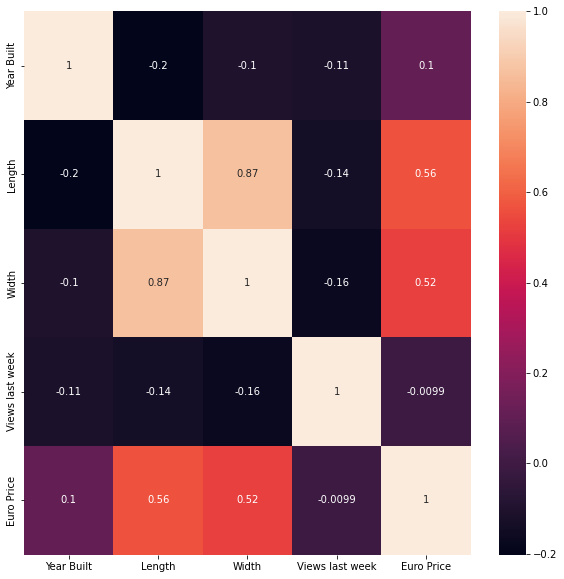

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### The coefficients represent the strength of the relationship between the 2 variables, whether positive (0-1), or negative (-1-0). The closer the coefficient is to -1 or 1, the stronger the relationship. 

### The strongest relationship is between the 'Width' & 'Length' variables (0.87), since many boats have the approximately the same ratio of width to length, leading to a strong positive relationship

### The next strongest relationships are between Length & Euro Price, and Width and Euro Price, respectively. This indicates that as the size of a boat increases, the price does as well. 

### Alternatively, both Width and Length possess a weak negative relationship with Views last week. An explanation for this could be that there is a smaller market for relatively larger boats, for various reasons.

### 4. Scatterplots

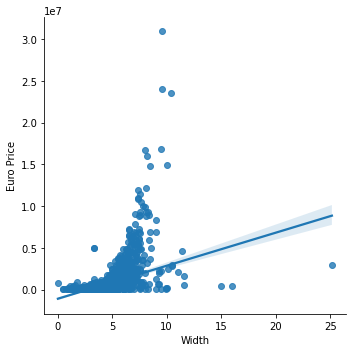

In [17]:
# Creating a scatterplot of width vs euro price

sns.lmplot(x = 'Width', y = 'Euro Price', data = df_clean)

#### It can be seen that as the width of a boat increases, the Euro Price does as well. Also, as the width of a boat exceeds 5 meters in Width, the price seems to exponentially increase. 

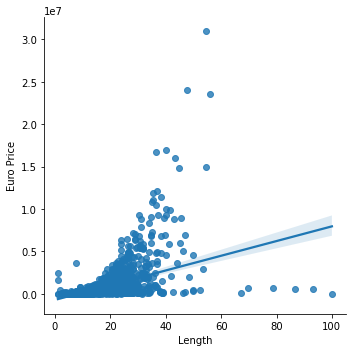

In [18]:
# Creating a scatterplot of length vs euro price

sns.lmplot(x = 'Length', y = 'Euro Price', data = df_clean)

#### Similar to width, it can be seen that as the length of a boat increases, the Euro Price increases as well. 

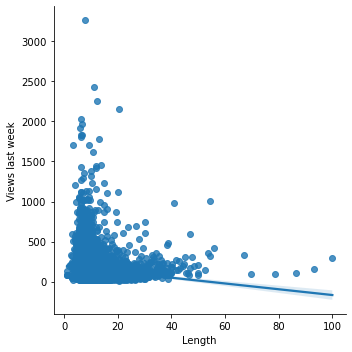

In [19]:
# Creating a scatterplot of length vs views last week

sns.lmplot(x = 'Length', y = 'Views last week', data = df_clean)

#### As the length of a boat increases, the number of views last week decreases. This could be associated with the positive relationship between length and price.

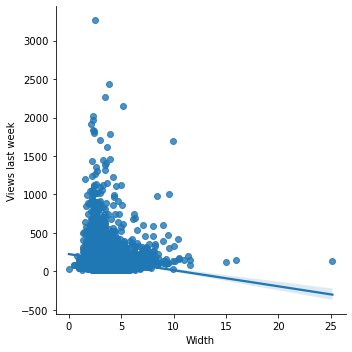

In [20]:
sns.lmplot(x = 'Width', y = 'Views last week', data = df_clean)

#### As the width of a boat increases, the number of views last week decreases. This could be associated with the positive relationship between width and price.

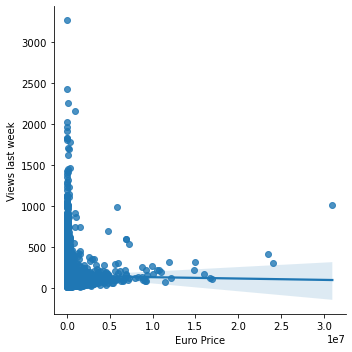

In [21]:
sns.lmplot(x = 'Euro Price', y = 'Views last week', data = df_clean)

#### It can be seen that boats with a lower price typically receive more views.

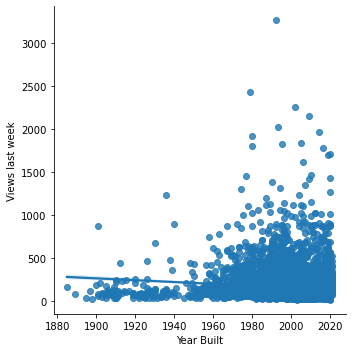

In [22]:
sns.lmplot(x = 'Year Built', y = 'Views last week', data = df_clean)

#### The plot shows that more recently built boats typically receive more views.

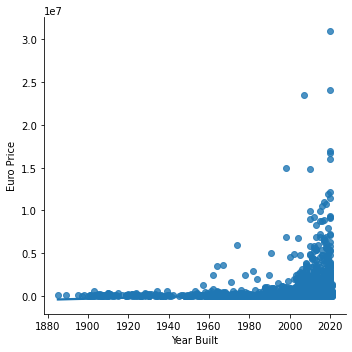

In [23]:
sns.lmplot(x = 'Year Built', y = 'Euro Price', data = df_clean)

#### The plot shows that more recently built boats tend to be listed at higher prices

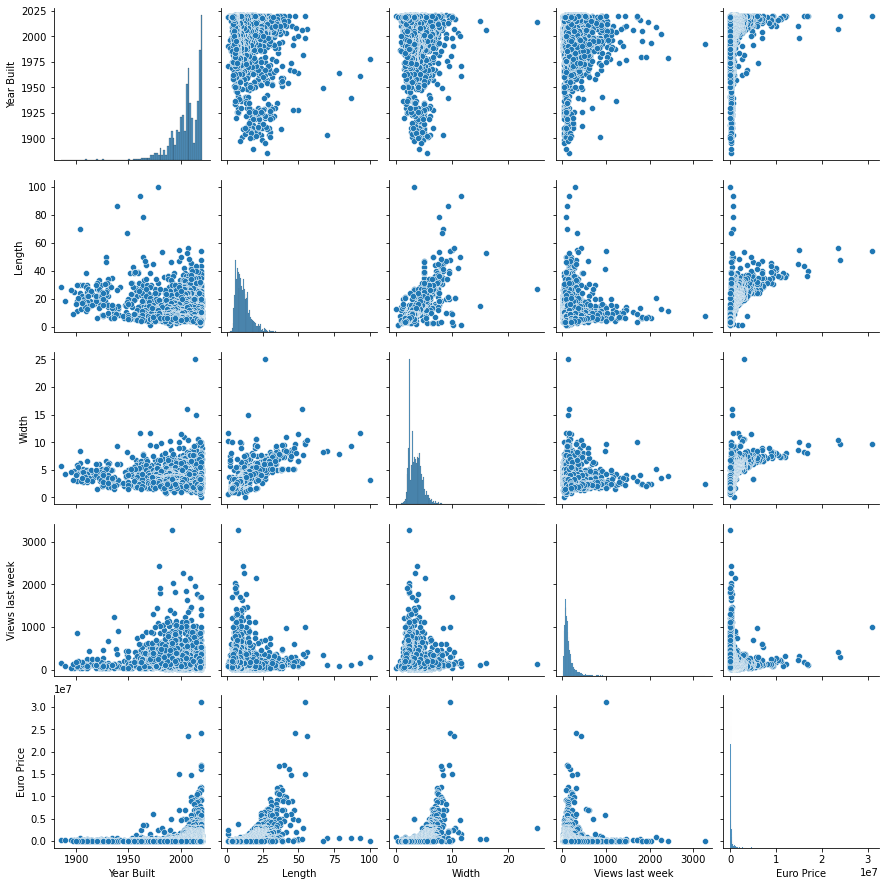

In [24]:
g = sns.pairplot(df_clean)

## Variables to Explore Further:

#### Year Built: I would like to explore if there certain time periods (5 to 10 year periods) that lead to a larger listing price, or number of views

#### Length: I would like to explore how grouping listings by length would affect the average number of views last week, as well as the listed price.

#### Euro Price: I would like to see if there are certain price ranges that attract more views 

<AxesSubplot:xlabel='Euro Price', ylabel='Count'>

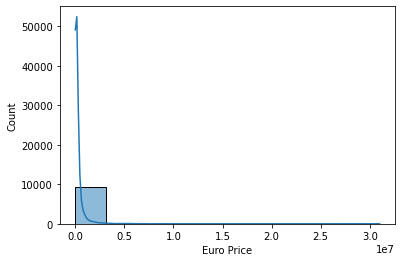

In [25]:
sns.histplot(df_clean['Euro Price'], bins = 10, kde = True)

<AxesSubplot:xlabel='Length', ylabel='Count'>

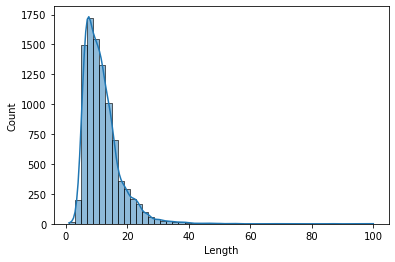

In [26]:
sns.histplot(df_clean['Length'], bins = 50, kde = True)

<AxesSubplot:xlabel='Width', ylabel='Count'>

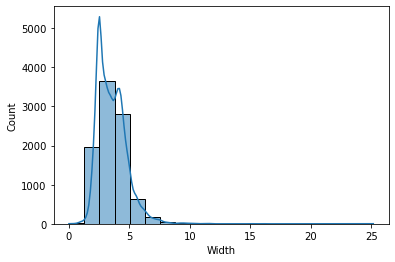

In [27]:
sns.histplot(df_clean['Width'], bins = 20, kde = True)

<AxesSubplot:xlabel='Year Built', ylabel='Count'>

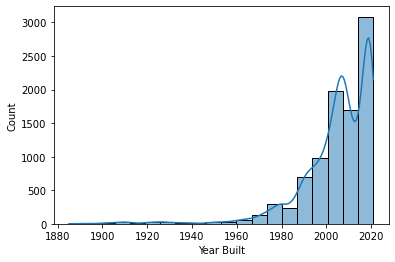

In [28]:
sns.histplot(df_clean['Year Built'], bins = 20, kde = True)

In [29]:
df_clean.loc[df_clean['Year Built'] > 2010, 'Age Range'] = 'After 2010'

In [30]:
df_clean.loc[(df_clean['Year Built'] >= 2000) & 
(df_clean['Year Built'] <= 2010), 'Age Range'] = '2000-2010'


In [31]:
df_clean.loc[df_clean['Year Built'] < 2000, 'Age Range'] = 'Before 2000'

In [32]:
df_clean['Age Range'].value_counts(dropna=False)

After 2010     3800
2000-2010      3156
Before 2000    2381
Name: Age Range, dtype: int64

In [33]:
df_clean.loc[df_clean['Length'] <= 8, 'Length Range'] = 'Under 8m long'

In [34]:
df_clean.loc[(df_clean['Length'] > 8) & 
(df_clean['Length'] <= 12), 'Length Range'] = '8-12m long'

In [35]:
df_clean.loc[df_clean['Length'] >12, 'Length Range'] = 'Over 12m long'

In [36]:
df_clean['Length Range'].value_counts(dropna=False)

Over 12m long    3429
8-12m long       3144
Under 8m long    2764
Name: Length Range, dtype: int64

<AxesSubplot:xlabel='Views last week', ylabel='Count'>

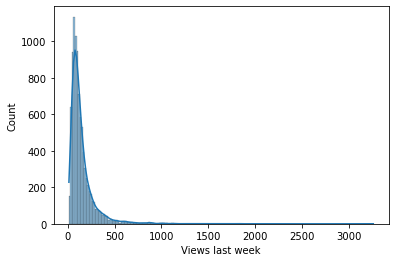

In [37]:
sns.histplot(df_clean['Views last week'], bins = 200, kde = True)

In [38]:
df_clean.loc[df_clean['Views last week'] <= 200, 'View Group'] = 'Under 200 views'

In [39]:
df_clean.loc[(df_clean['Views last week'] >= 200) & 
(df_clean['Views last week'] <= 400), 'View Group'] = '200-400'


In [40]:
df_clean.loc[df_clean['Views last week'] >400, 'View Group'] = 'Over 400 views'

### 5. Categorical Plots

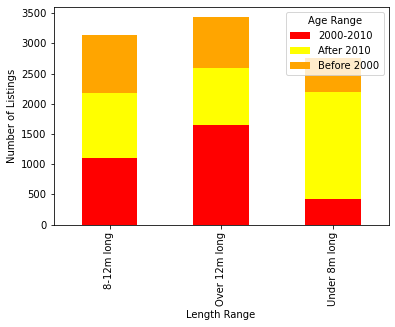

In [41]:
length_age_sbar = df_clean.groupby('Length Range')['Age Range'].value_counts().unstack().plot.bar(stacked = True, ylabel = 'Number of Listings', color = ['red', 'yellow', 'orange'])

### It appears that the majority of the listed boats that are under 8m long were built after 2010, a much larger proprtion than the larger sized boats. 

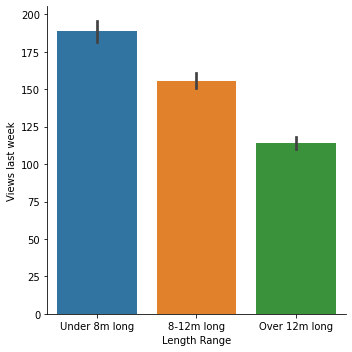

In [42]:
x=sns.catplot(data=df_clean, x="Length Range", y="Views last week", kind="bar")


### The graph shows that smaller boats tend to receive more views than larger boats.

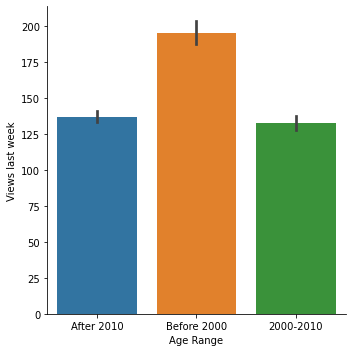

In [43]:
x=sns.catplot(data=df_clean, x="Age Range", y="Views last week", kind="bar")


# Revisiting Questions


### It was determined that length & width have the strongest correlation with views in the last 7 days, this question will be investigated further later.

### It was also determined that specifically boats under 8 feet long receive the highest number of views in the last 7 days on average

### Boats manufactured before 2000 tend to receive the most views in the last 7 days.

# New Questions

### How does fuel type affect the number of views a listing receives?

### What length to width ratio yields the most views?

### Which price range receives the most views?

### 6. Exporting Data

In [45]:
# Exporting data
df_clean.to_pickle(os.path.join(path, '2Clean_Boat_Data.pkl'))